<a href="https://colab.research.google.com/github/Sazzad8311/ETE-456/blob/main/Regression_Project_1608029_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ETE-456:** Regression Project on Medical Cost Personal Dataset


> Objective: 
 1. *Apply various regression algorithms on the real world dataset.*

##Dataset (Medical Cost Personal Datasets)
Columns

**age:** age of primary beneficiary

**sex:** insurance contractor gender, female, male

**bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

**children:** Number of children covered by health insurance / Number of dependents

**smoker: **Smoking

**region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

**charges:** Individual medical costs billed by health insurance

In [ ]:
import warnings
warnings.filterwarnings("ignore")

### **Import the Libraries**

In [ ]:
import numpy as np        
import pandas as pd     
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR 

### **Dataset**

In [ ]:
# Download the data
!wget -O insurance.csv https://www.dropbox.com/s/mwgqgjbmfw0xa5p/insurance.csv?dl=0

--2021-12-20 06:39:42--  https://www.dropbox.com/s/mwgqgjbmfw0xa5p/insurance.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6027:18::a27d:4812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/mwgqgjbmfw0xa5p/insurance.csv [following]
--2021-12-20 06:39:42--  https://www.dropbox.com/s/raw/mwgqgjbmfw0xa5p/insurance.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca378bd891d426d7507180d765e.dl.dropboxusercontent.com/cd/0/inline/BcKvmJahj7TsD56q09TF6vpqqL05tShEg2053gFA-U1dhoHcZNhmNvjB-TGeiRHlsHB4jn5P5ZBBoBGHnqI1RnZfDLqhDLobSQqMhWjoseao9JvrTSnxZ8XSo7BlElkw0CwDZ7yGSXHgh_M41U9XIpL2/file# [following]
--2021-12-20 06:39:42--  https://uca378bd891d426d7507180d765e.dl.dropboxusercontent.com/cd/0/inline/BcKvmJahj7TsD56q09TF6vpqqL05tShEg2053gFA-U1dhoHcZNhmNvjB-TGeiRHlsHB4jn5P5ZBBoBG

In [ ]:
"""importing the dataset """

dataset = pd.read_csv('insurance.csv')
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Feature Columns
features = dataset[['age', 'sex', 'bmi', 'children','smoker','region']]
# Target Columns
target = dataset[['charges']]

In [ ]:
features

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


### **Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
labelencoder_f = LabelEncoder()
#the country column is represented by numeric value
features['sex'] = labelencoder_f.fit_transform(features['sex'])
features['smoker'] = labelencoder_f.fit_transform(features['smoker'])
features['region'] = labelencoder_f.fit_transform(features['region'])

In [ ]:
features

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


### Taking care of missing values

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(missing_values=np.nan,strategy = "mean") # imputer is an object of Imputer class 
imputer = imputer.fit(features[['age', 'sex', 'bmi', 'children','smoker','region']])

In [ ]:
features[['age', 'sex', 'bmi', 'children','smoker','region']]= imputer.transform(features[['age', 'sex', 'bmi', 'children','smoker','region']])

In [ ]:
features

,age,sex,bmi,children,smoker,region
0,19.0,0.0,27.900,0.0,1.0,3.0
1,18.0,1.0,33.770,1.0,0.0,2.0
2,28.0,1.0,33.000,3.0,0.0,2.0
3,33.0,1.0,22.705,0.0,0.0,1.0
4,32.0,1.0,28.880,0.0,0.0,1.0
...,...,...,...,...,...,...
1333,50.0,1.0,30.970,3.0,0.0,1.0
1334,18.0,0.0,31.920,0.0,0.0,0.0
1335,18.0,0.0,36.850,0.0,0.0,2.0
1336,21.0,0.0,25.800,0.0,0.0,3.0


In [ ]:
imputer = SimpleImputer(missing_values=np.nan,strategy = "mean") # imputer is an object of Imputer class 
imputer = imputer.fit(target[['charges']])

In [ ]:
target[['charges']]= imputer.transform(target[['charges']])

In [ ]:
target

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


### **Splitting Dataset**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
"""Spliting the Dataset into Training Set and Test Set """

X_train,X_test,y_train,y_test=train_test_split(features,target,test_size = 0.2,random_state = 0)
# random_state = 0 is select to get the same result

In [ ]:
print(X_train.shape)
print(X_test.shape)

(1070, 6)
(268, 6)


### **Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
X_sc = StandardScaler()
y_sc = StandardScaler()
y_train = y_sc.fit_transform(y_train[['charges']])
y_test = y_sc.transform(y_test[['charges']])

### Different types of Regression Algorithm

1. Linear Regression (Univariate or Multivariate)
2. Support Vector Regression
3. Decision Tree Regression
4. Random Forest Regressrion

### **Simple Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression


regressor = LinearRegression()


regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
# predicting the Test set Results
y_pred = regressor.predict(X_test)

In [ ]:
regressor.score(X_train,y_train)

0.7368306228430945

In [ ]:
y_test

array([[-2.90360755e-01],
       [-3.88647200e-01],
       [ 2.71438394e+00],
       [-2.09721124e-02],
       [-2.97065319e-01],
       [-7.26671304e-01],
       [-9.18940714e-01],
       [-1.47361673e-01],
       [-4.73043767e-01],
       [-6.49444142e-01],
       [-5.38531882e-01],
       [-2.26101189e-01],
       [-4.89698454e-01],
       [-7.52999425e-01],
       [ 4.26736889e-01],
       [-2.08671402e-01],
       [-5.65894545e-02],
       [-8.11006298e-01],
       [-5.63185752e-01],
       [ 1.69328373e+00],
       [ 8.99164540e-01],
       [-4.65863314e-02],
       [ 8.22176839e-01],
       [ 8.23835038e-01],
       [-9.62666851e-01],
       [-7.12701491e-01],
       [-7.90788753e-01],
       [-4.60891484e-01],
       [-7.88784629e-01],
       [-3.99857588e-01],
       [-4.29404684e-01],
       [ 2.98733744e+00],
       [-1.85261566e-02],
       [ 6.20458841e-01],
       [ 1.14477957e-01],
       [-7.56972780e-01],
       [-4.05394683e-01],
       [ 3.17310604e+00],
       [ 2.2

In [ ]:
X_test

,age,sex,bmi,children,smoker,region
578,52.0,1.0,30.200,1.0,0.0,3.0
610,47.0,0.0,29.370,1.0,0.0,2.0
569,48.0,1.0,40.565,2.0,1.0,1.0
1034,61.0,1.0,38.380,0.0,0.0,1.0
198,51.0,0.0,18.050,0.0,0.0,1.0
...,...,...,...,...,...,...
1084,62.0,0.0,30.495,2.0,0.0,1.0
726,41.0,1.0,28.405,1.0,0.0,1.0
1132,57.0,1.0,40.280,0.0,0.0,0.0
725,30.0,0.0,39.050,3.0,1.0,2.0


In [ ]:
y_pred

array([[-1.82397841e-01],
       [-2.85099148e-01],
       [ 2.07069569e+00],
       [ 2.44003975e-01],
       [-5.23689076e-01],
       [-7.71045640e-01],
       [-9.72926790e-01],
       [ 9.03680276e-02],
       [-3.54761076e-01],
       [-4.81831323e-01],
       [-7.22976711e-01],
       [-2.46702450e-01],
       [-3.79509044e-01],
       [-7.57918614e-01],
       [ 1.22019971e+00],
       [-1.80529836e-01],
       [-1.62836802e-01],
       [-5.98833743e-01],
       [-4.19907641e-01],
       [ 1.15573478e+00],
       [ 1.70180511e+00],
       [ 8.90214986e-02],
       [-1.26625563e-01],
       [ 1.60401397e+00],
       [-7.33827716e-01],
       [-3.38672047e-01],
       [-1.00833105e+00],
       [-2.59908886e-01],
       [-7.61123005e-01],
       [-2.37545828e-01],
       [-3.54025144e-01],
       [ 2.25865181e+00],
       [ 1.90146991e-01],
       [ 3.89151803e-02],
       [ 9.63818549e-01],
       [-6.74078969e-01],
       [-2.99239284e-02],
       [ 1.44695638e+00],
       [ 1.6

### **Evaluation Matrices**

1. Mean Absolute Error (MAE)
2. Mean Squared Error (MSE)
3. R-Squared Error

In [ ]:
from sklearn.metrics import mean_absolute_error

# MAE

mean_absolute_error(y_test, y_pred)

0.328251006254937

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

0.22213004284614

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.7998747145449959

In [ ]:
regressor.score(X_train,y_train)

0.7368306228430945

### **Support Vector Regression**

In [ ]:
# Fitting SVR to the dataset
from sklearn.svm import SVR 

regressor = SVR(kernel = 'linear')
regressor.fit(X_train,y_train)

SVR(kernel='linear')

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
regressor.score(X_train,y_train)

0.6795638290744734

In [ ]:
r2_score(y_test, y_pred)

0.7689076024715965

In [ ]:
mean_absolute_error(y_test, y_pred)

0.26206449818981736

In [ ]:
mean_squared_error(y_test, y_pred)

0.25650214088485607

### **Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor


regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train,y_train) 


DecisionTreeRegressor(random_state=0)

In [ ]:
y_pred = regressor.predict(X_test)
r2_score(y_test, y_pred)

0.6562575965127319

In [ ]:
regressor.score(X_train,y_train)

0.9982963931606104

In [ ]:
mean_squared_error(y_test, y_pred)

0.3815385679079004

In [ ]:
mean_absolute_error(y_test, y_pred)

0.3008404697042962

### **Random Forest Regression**

In [ ]:
# Fitting the Random Forest Regression with the dataset
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 10,random_state = 0) # n estiamator is the number of decision trees
regressor.fit(X_train,y_train) 

RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
y_pred = regressor.predict(X_test)
r2_score(y_test, y_pred)

0.8757214770662562

In [ ]:
regressor.score(X_train,y_train)

0.9644959129365694

In [ ]:
mean_absolute_error(y_test, y_pred)

0.2156241682333011

In [ ]:
mean_squared_error(y_test, y_pred)

0.1379435565144235

## Result Analysis

In this project, 4 different kind of regression algorithm is used. The comparision between these algorithms using evaluation matrices are given below:

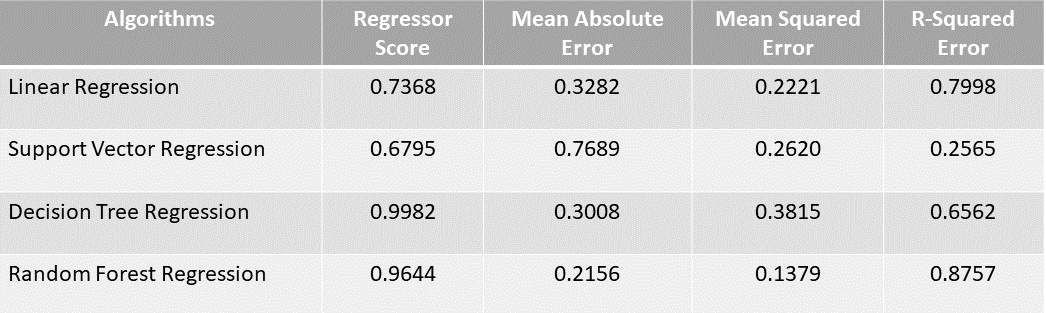

## Discussion
In this experiment, Regression is done on **"Medical Cost Personal Dataset"** using four different Regressor algorithms, those are **Linear Regression, Support Vector Regression, Decision Tree Regression and Rando Forest Regression.**
First of all the libraries were imported and then dataset was retrived from storage and some preprocessing was done like **Encoding, Taking care of missing data and Feature Scaling.** 
The **charges** column of dataset was taken as the target dataset and rest of them were taken as features. Then the dataset is splitted into training and testing where training data was 80% of the dataset. 
After training the data into regressors some evaluation matrices were used to evaluate how the model worked. From Result analysis, it is seen that Random Forest Regressor has better evaluation matrices.   